# Track analysis
Analyze tracks to filter short tracks, tracks on angle

In [1]:
import sys
from pathlib import Path
import pickle

import cv2
import numpy as np
from rich import progress
import matplotlib.pyplot as plt
import pandas as pd
# add safas to PATH
sys.path.append(str(Path().absolute().parents[1])) 
# load an image from safas data module
from safas import data

src = data.brightmudflocs()
src = src[400:1000, 400:1000, :] #crop 


In [60]:
df = pd.read_csv(f"full_output.gz")

In [61]:
# filter on length
min_track_frames = 5
track_uuid, ct = np.unique(df["track_uuid"], return_counts=True)
track_uuid = track_uuid[ct>=min_track_frames]
df = df.set_index("track_uuid").loc[track_uuid]

In [80]:
def angle_between(v1, v2):
    """ angle between vectors v1 and v2 """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

def unit_vector(vector):
    """  unit vector of the vector """
    # true divide error not solved in some cases
    return vector / np.linalg.norm(vector)

if df.index.name != "track_uuid": df.set_index("track_uuid", inplace=True)
    
print(f"Analyzing track angles")
angles_thresh = 10

df["angles"] = np.nan
for track_uuid in df.index.unique(): 
    pts = df.loc[track_uuid][["x_pos", "y_pos"]].values
    angles = np.array([angle_between(v, [0, 1]) for v in (pts[1:] - pts[:-1] )])
    df.loc[track_uuid, 'angles'].iloc[1:] = angles
    df.loc[track_uuid, 'angles_thresh'] = (np.abs(angles) > angles_thresh).any()
    
df["angle_color"] = df["angles_thresh"].map({False: "g", True: "r"})

Analyzing track angles


C:\Users\rmcma\Miniconda3\envs\htapp\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\rmcma\Miniconda3\envs\htapp\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Analyzing track angles


C:\Users\rmcma\Miniconda3\envs\htapp\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(0.0, 2000.0)

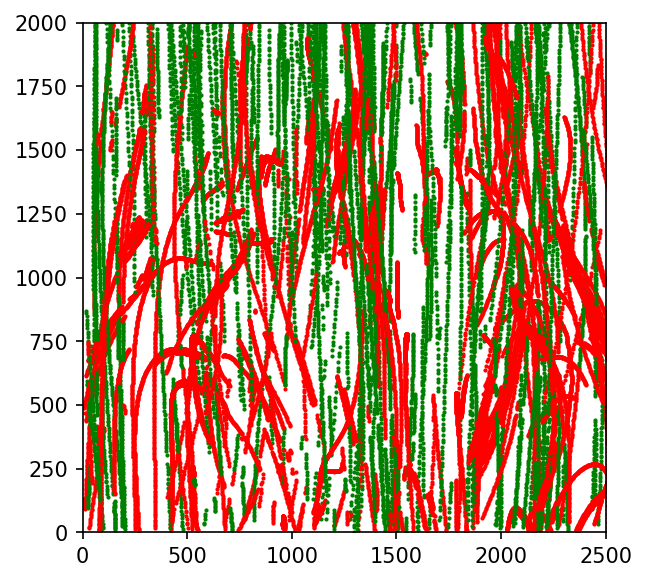

In [81]:
f, ax = plt.subplots(1,1, dpi=150, figsize=(4.5, 4.5))

for track_uuid in df.index.unique(): 
    ax.plot(df.loc[track_uuid].x_pos, df.loc[track_uuid].y_pos, ls="None", marker=".", 
            markersize=2, color=df.loc[track_uuid]["angle_color"][0])
    
ax.set_xlim(0, 2500)
ax.set_ylim(0, 2000)

(0.0, 2000.0)

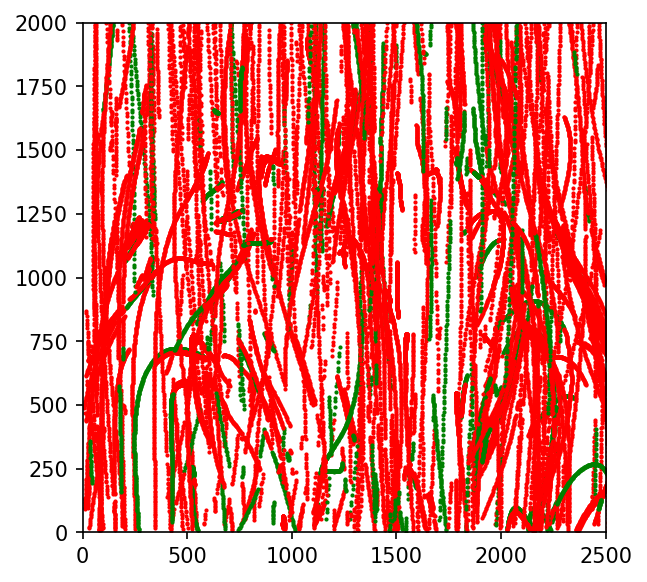

In [155]:
f, ax = plt.subplots(1,1, dpi=150, figsize=(4.5, 4.5))
color = {1: "r", 2: "g"}
for track_uuid in df.index.unique(): 
    ax.plot(df.loc[track_uuid].x_pos, df.loc[track_uuid].y_pos, ls="None", marker=".", markersize=2, color=df.loc[track_uuid]["angmode"][0])
    
ax.set_xlim(0, 2500)
ax.set_ylim(0, 2000)

In [83]:
df.reset_index(inplace=True, drop=False)

In [98]:
df.loc[1:, "angles"] = 1e3

0                NaN
1           0.000000
2           3.632951
3        1000.000000
4        1000.000000
            ...     
45781       2.241815
45782       2.859617
45783       2.699679
45784       2.397060
45785       2.709244
Name: angles, Length: 45786, dtype: float64